# Assignment No 4

The following questions refer to the dataset “Autoparts.csv” posted on Canvas. The data contains information about sales of auto parts from 18 sales regions around the USA. For each region, we have data on sales amount (in thousands of dollars, denoted by “Sales”), the amount of money spent on marketing (in thousands of dollars, denoted by “Mktg”) as well as the number of sales outlets, the size of the population (measured in millions), the number of registered vehicles (also measured in millions), and the number of sales reps per region. The following questions refer to this data.


In [5]:
dt <- read.csv(choose.files())
dt

Region,Sales,Mktg,Outlets,Popn,Vehicles,Reps
1,78,482,482,3,1,8
2,59,429,262,2,1,10
3,71,84,604,4,1,11
4,117,245,837,5,2,13
5,99,134,819,7,3,9
6,127,461,939,7,3,14
7,38,323,158,1,0,6
8,79,351,497,3,1,9
9,104,298,796,6,2,14
10,47,253,305,3,1,7


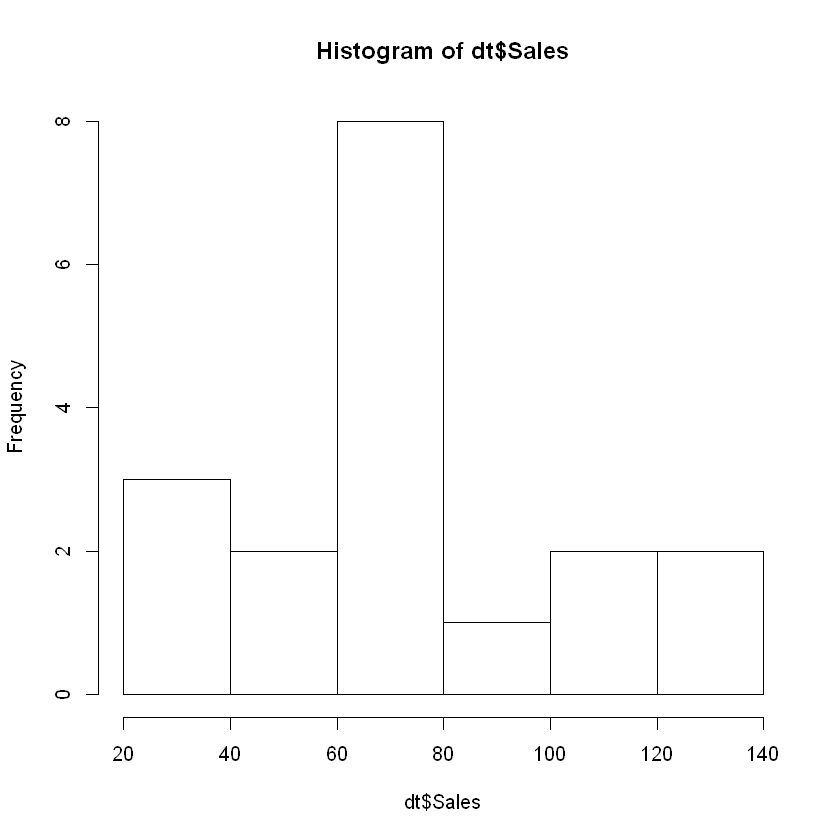

In [6]:
hist(dt$Sales)

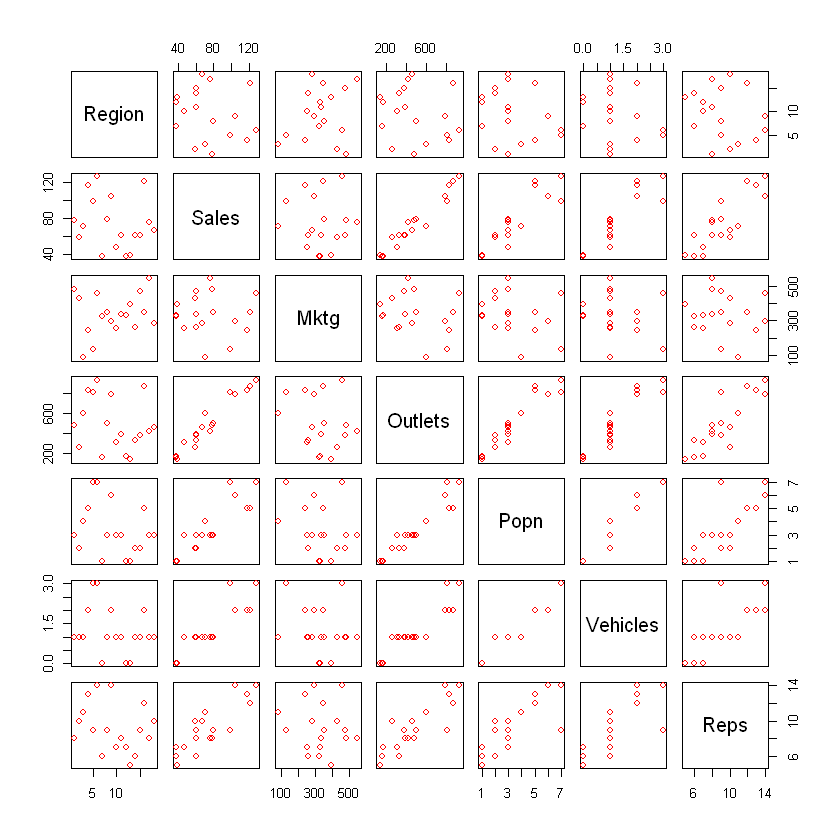

In [8]:
plot(dt, col = 'red')

[1] -0.03474256

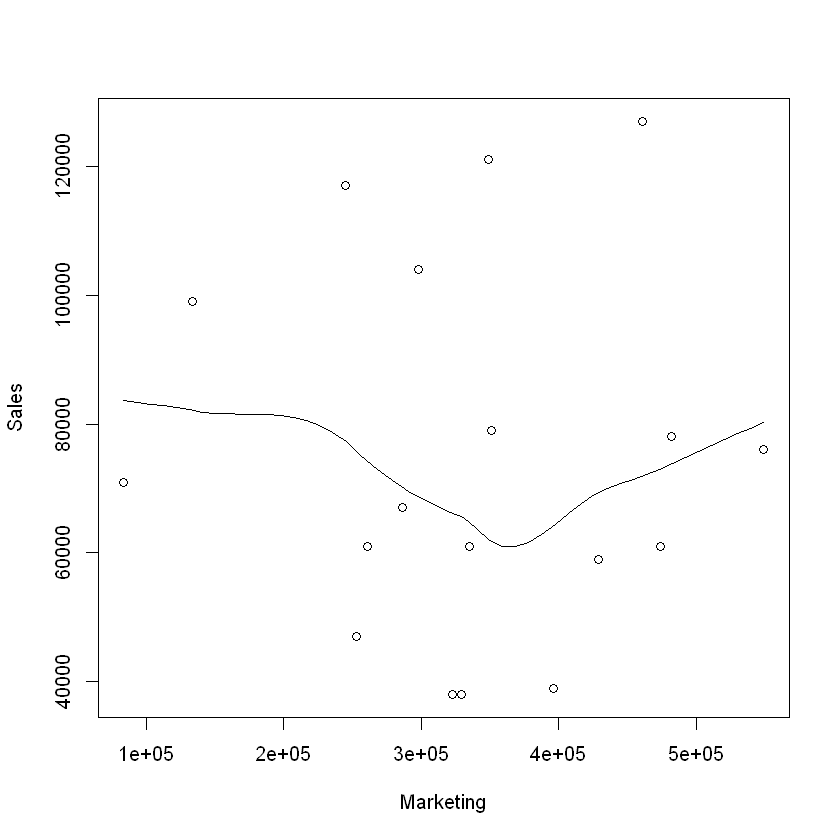

In [13]:
Marketing <- dt$Mktg*1000
Sales <- dt$Sales*1000

scatter.smooth(Marketing, Sales)
cor(Marketing, Sales)

In [15]:
boxplot.stats(Marketing)

$stats
[1]  84000 261000 332000 429000 549000

$n
[1] 18

$conf
[1] 269435.2 394564.8

$out
numeric(0)

In [16]:
boxplot.stats(Sales)

$stats
[1]  38000  59000  69000  99000 127000

$n
[1] 18

$conf
[1] 54103.62 83896.38

$out
numeric(0)

# Part 1
We would like to investigate the impact of marketing efforts on sales. To that end, run a regression model with “Sales” as the response variable and “Mktg” as the (only) explanatory variable. Copy and paste the R code and the output, and writethree key findings that you can infer from this analysis.

In [17]:
ln_mk_sl <- lm(Sales~Marketing)
summary(ln_mk_sl)


Call:
lm(formula = Sales ~ Marketing)

Residuals:
   Min     1Q Median     3Q    Max 
-36714 -14685  -6855  18193  53426 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)  7.738e+04  2.110e+04   3.667  0.00208 **
Marketing   -8.265e-03  5.944e-02  -0.139  0.89114   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 29310 on 16 degrees of freedom
Multiple R-squared:  0.001207,	Adjusted R-squared:  -0.06122 
F-statistic: 0.01934 on 1 and 16 DF,  p-value: 0.8911


# Observations:
1. The p value is significantly high. Thus we reject the null hypothesis.
2. Adjusted R-squared is negative.
3. The positive intercept indicated that even if the sales were 0, the sales are gonna be positive.


# Part 2
Now, we would like to investigate the impact of all variables. To that end, run a regression model with “Sales” as the response variable and all other variables in the data set as predictor variables. Copy and paste the R code and the output, and writethree key findings that you can infer from this analysis. Does anything in this output strike you as “strange”?

In [18]:
lm_allvariables <- lm(Sales~Mktg+Region+Outlets+Popn+Vehicles+Reps, data = dt)
summary(lm_allvariables)


Call:
lm(formula = Sales ~ Mktg + Region + Outlets + Popn + Vehicles + 
    Reps, data = dt)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.6819 -1.2894  0.2493  2.5316  4.3800 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 12.29971    6.09802   2.017  0.06877 .  
Mktg         0.03732    0.01002   3.723  0.00336 ** 
Region      -0.14240    0.21094  -0.675  0.51358    
Outlets      0.13417    0.01658   8.094 5.84e-06 ***
Popn        -6.32892    2.76251  -2.291  0.04270 *  
Vehicles     6.51666    4.58553   1.421  0.18300    
Reps        -0.14921    0.80056  -0.186  0.85554    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.277 on 11 degrees of freedom
Multiple R-squared:  0.9854,	Adjusted R-squared:  0.9774 
F-statistic: 123.6 on 6 and 11 DF,  p-value: 1.918e-09


# Observations:

1. The residual standard error reduces drastically as compared to the previous model. 
2. The adjusted R squared is higher.
3. The p value is small enough to reject the null hypothesis.

The positive intercept indicates that the values for sales will still be 12.29971 even if all the other attributes are brought down to 0. This looks 'Strange'.

# Part 3 
Create a table listing the multiple R-squared, adjusted R-squared, AIC, and BIC of the two models above. Which is the better model and why?

In [19]:
AIC(ln_mk_sl)

[1] 425.2521

In [20]:
BIC(ln_mk_sl)

[1] 427.9233

In [21]:
AIC(lm_allvariables)

[1] 110.5343

In [22]:
BIC(lm_allvariables)

[1] 117.6572

# Comparison Table

                          Only Marketing                      All variables
Multiple R-squared         0.001207                            0.9854
Adjusted R-squared        -0.06122                             0.9774
AIC                        425.252135999677                    110.534273759803
BIC                        427.923251273365                    117.657247822972 

![image](C:\Users\nikhi\OneDrive\Documents\Statistical-Data-Mining\A4.PNG)

# Comparison
Looking at the above table contents, It is safe to say that the linear regression model for all variables looks a better fit to the data. It also is better fit to estimate correct prediction.